# Car Price Prediction

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

## Reading the dataset

In [2]:
df=pd.read_csv('CarData.csv')

## print shape of dataset with rows and columns
print(df.shape)

(205, 26)


In [3]:
## print the top5 records
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

##### Observations
- car_ID  has a unique value for each instance.So it can be dropped. 

In [4]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### Observations: 
- Null Values are not present in the dataset

In [7]:
## Removing the car_ID feature
df=df.drop('car_ID',axis=1)

In [8]:
df.shape

(205, 25)

## Preprocessing of Data

In [9]:
## CarName Variable has two parts:1.Company name && 2.Model name
#Each element of the CarName column will be split into two Strings, and we will only keep the first one
CarName= df['CarName'].apply(lambda x : x.split(' ')[0])

#Remove CarModel column
df.drop(['CarName'],axis=1,inplace=True)
#Insert the new variable as a column in our dataset
df.insert(1,"CarName",CarName)



##### Observations
CarName=CompanyName+ModelName   ------>     CarName=CompanyName

In [10]:
df

symboling      CarName fueltype aspiration doornumber      carbody  \
0            3  alfa-romero      gas        std        two  convertible   
1            3  alfa-romero      gas        std        two  convertible   
2            1  alfa-romero      gas        std        two    hatchback   
3            2         audi      gas        std       four        sedan   
4            2         audi      gas        std       four        sedan   
..         ...          ...      ...        ...        ...          ...   
200         -1        volvo      gas        std       four        sedan   
201         -1        volvo      gas      turbo       four        sedan   
202         -1        volvo      gas        std       four        sedan   
203         -1        volvo   diesel      turbo       four        sedan   
204         -1        volvo      gas      turbo       four        sedan   

    drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0          rwd          front       88.6      168.8      64.1       48.8   
1          rwd          front       88.6      168.8      64.1       48.8   
2          rwd          front       94.5      171.2      65.5       52.4   
3          fwd          front       99.8      176.6      66.2       54.3   
4          4wd          front       99.4      176.6      66.4       54.3   
..         ...            ...        ...        ...       ...        ...   
200        rwd          front      109.1      188.8      68.9       55.5   
201        rwd          front      109.1      188.8      68.8       55.5   
202        rwd          front      109.1      188.8      68.9       55.5   
203        rwd          front      109.1      188.8      68.9       55.5   
204        rwd          front      109.1      188.8      68.9       55.5   

     curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0          2548       dohc           four         130       mpfi       3.47   
1          2548       dohc           four         130       mpfi       3.47   
2          2823       ohcv            six         152       mpfi       2.68   
3          2337        ohc           four         109       mpfi       3.19   
4          2824        ohc           five         136       mpfi       3.19   
..          ...        ...            ...         ...        ...        ...   
200        2952        ohc           four         141       mpfi       3.78   
201        3049        ohc           four         141       mpfi       3.78   
202        3012       ohcv            six         173       mpfi       3.58   
203        3217        ohc            six         145        idi       3.01   
204        3062        ohc           four         141       mpfi       3.78   

     stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0      2.68               9.0         111     5000       21          27   
1      2.68               9.0         111     5000       21          27   
2      3.47               9.0         154     5000       19          26   
3      3.40              10.0         102     5500       24          30   
4      3.40               8.0         115     5500       18          22   
..      ...               ...         ...      ...      ...         ...   
200    3.15               9.5         114     5400       23          28   
201    3.15               8.7         160     5300       19          25   
202    2.87               8.8         134     5500       18          23   
203    3.40              23.0         106     4800       26          27   
204    3.15               9.5         114     5400       19          25   

       price  
0    13495.0  
1    16500.0  
2    16500.0  
3    13950.0  
4    17450.0  
..       ...  
200  16845.0  
201  19045.0  
202  21485.0  
203  22470.0  
204  22625.0  

[205 rows x 25 columns]

In [11]:
#unique values (companyname)
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- Observations:
- Some CarName are duplicates due to spelling mistakes

In [12]:
len(df.CarName.unique())

28

In [13]:
#Correction (spelling error)
df.CarName = df.CarName.str.lower()

def new_name(a,b):
    df.CarName.replace(a,b,inplace=True)

new_name('maxda','mazda')
new_name('porcshce','porsche')
new_name('toyouta','toyota')
new_name('vokswagen','volkswagen')
new_name('vw','volkswagen')

print(df.CarName.unique())
print(len(df.CarName.unique()))

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
22


## Univariate Analysis

In [14]:
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

In [15]:
num_cols

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68               9.0         111     5000   
1           130       3.47    2.68               9.0         111     5000   
2           152       2.68    3.47               9.0         154     5000   
3           109       3.19    3.40              10.0         102     5500   
4           136       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
200         141       3.78    3.15               9.5         114     5400   
201         141       3.78    3.15               8.7         160     5300   
202         173       3.58    2.87               8.8         134     5500   
203         145       3.01    3.40              23.0         106     4800   
204         141       3.78    3.15               9.5         114     5400   

     citympg  highwaympg    price  
0         21          27  13495.0  
1         21          27  16500.0  
2         19          26  16500.0  
3         24          30  13950.0  
4         18          22  17450.0  
..       ...         ...      ...  
200       23          28  16845.0  
201       19          25  19045.0  
202       18          23  21485.0  
203       26          27  22470.0  
204       19          25  22625.0  

[205 rows x 15 columns]

In [16]:
cat_cols

CarName fueltype aspiration doornumber      carbody drivewheel  \
0    alfa-romero      gas        std        two  convertible        rwd   
1    alfa-romero      gas        std        two  convertible        rwd   
2    alfa-romero      gas        std        two    hatchback        rwd   
3           audi      gas        std       four        sedan        fwd   
4           audi      gas        std       four        sedan        4wd   
..           ...      ...        ...        ...          ...        ...   
200        volvo      gas        std       four        sedan        rwd   
201        volvo      gas      turbo       four        sedan        rwd   
202        volvo      gas        std       four        sedan        rwd   
203        volvo   diesel      turbo       four        sedan        rwd   
204        volvo      gas      turbo       four        sedan        rwd   

    enginelocation enginetype cylindernumber fuelsystem  
0            front       dohc           four       mpfi  
1            front       dohc           four       mpfi  
2            front       ohcv            six       mpfi  
3            front        ohc           four       mpfi  
4            front        ohc           five       mpfi  
..             ...        ...            ...        ...  
200          front        ohc           four       mpfi  
201          front        ohc           four       mpfi  
202          front       ohcv            six       mpfi  
203          front        ohc            six        idi  
204          front        ohc           four       mpfi  

[205 rows x 10 columns]

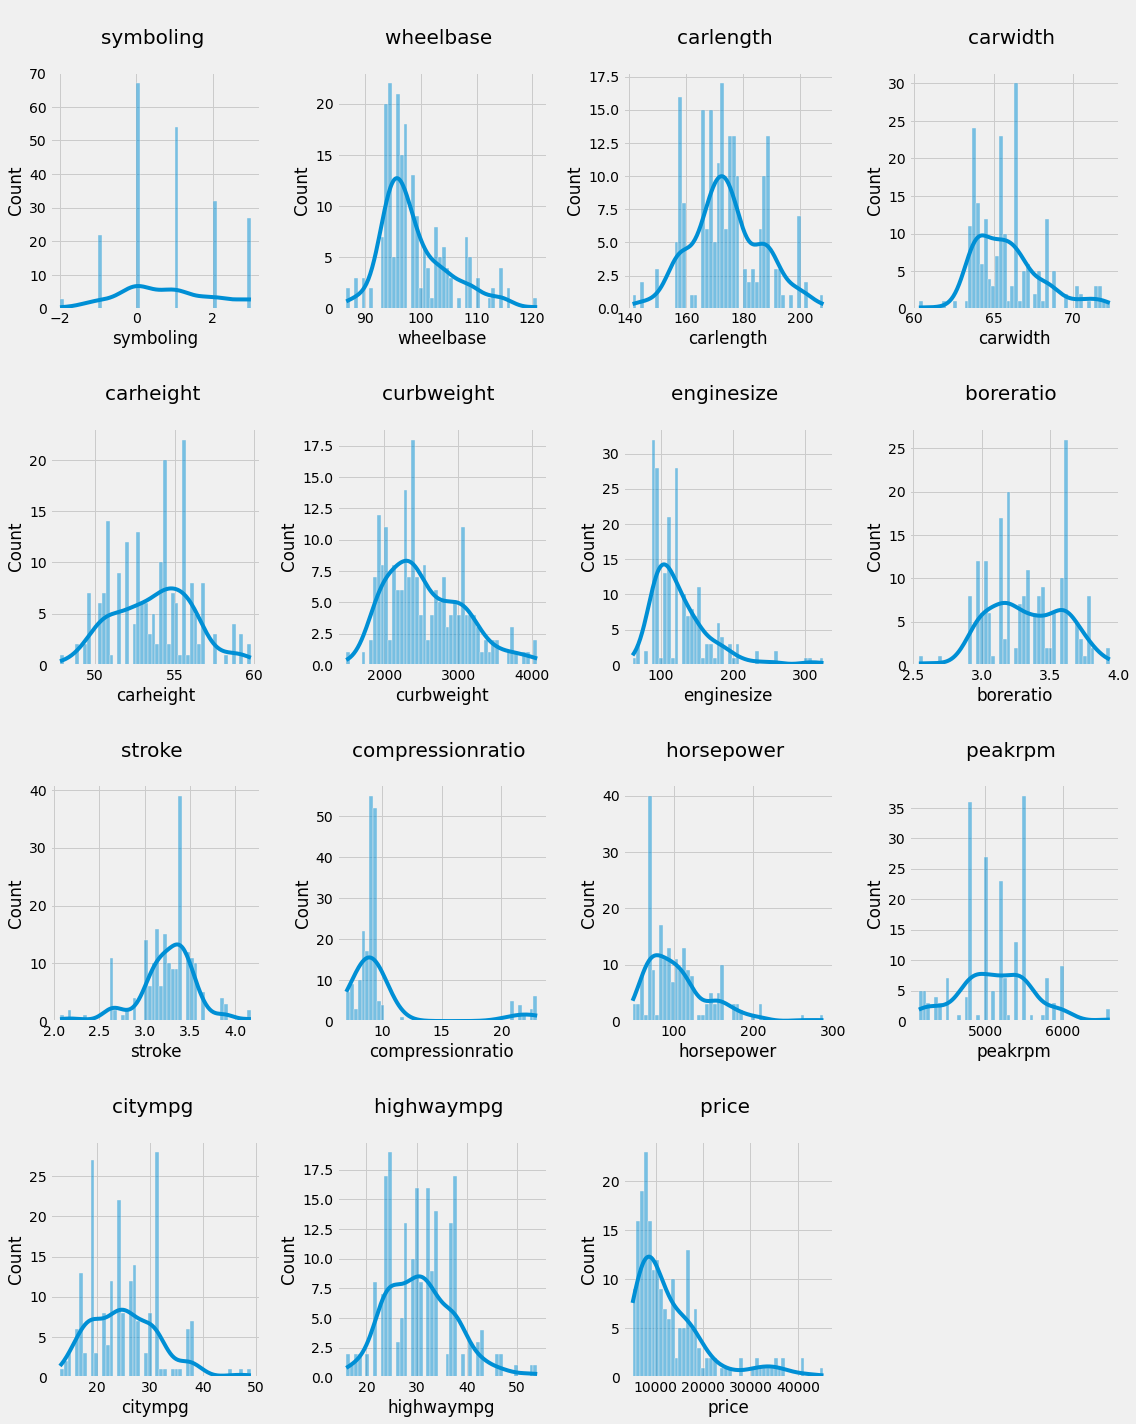

In [17]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(x = cols[i], data = df, ax = ax, palette='rocket', kde = True, bins = 50)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

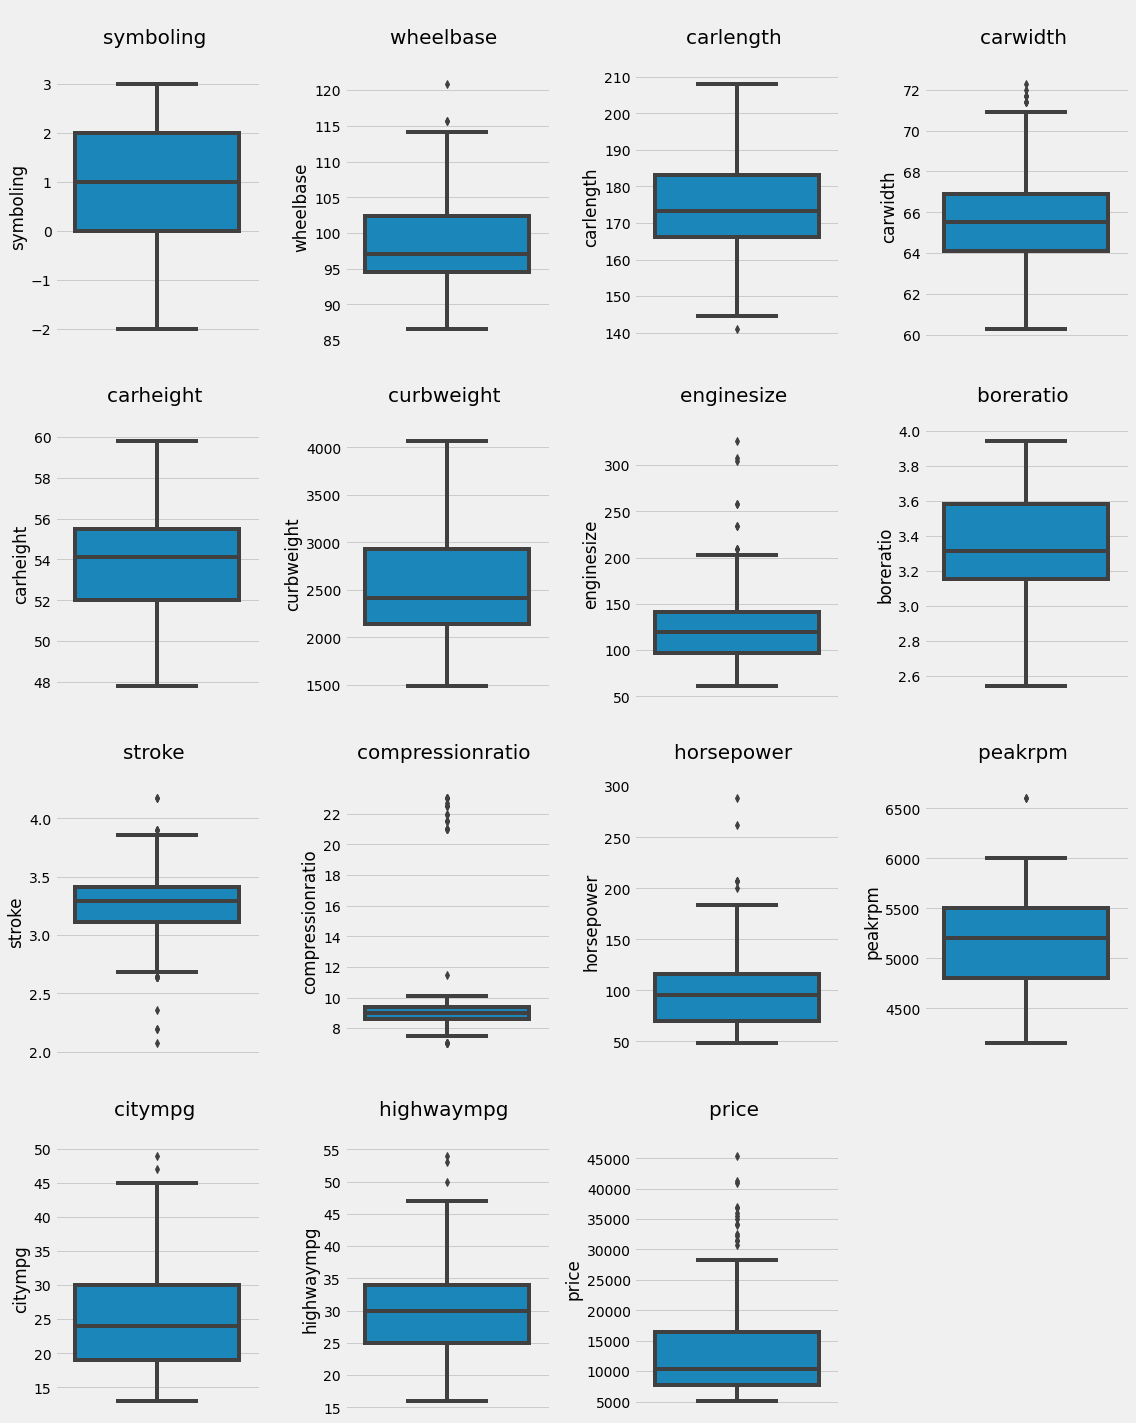

In [18]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

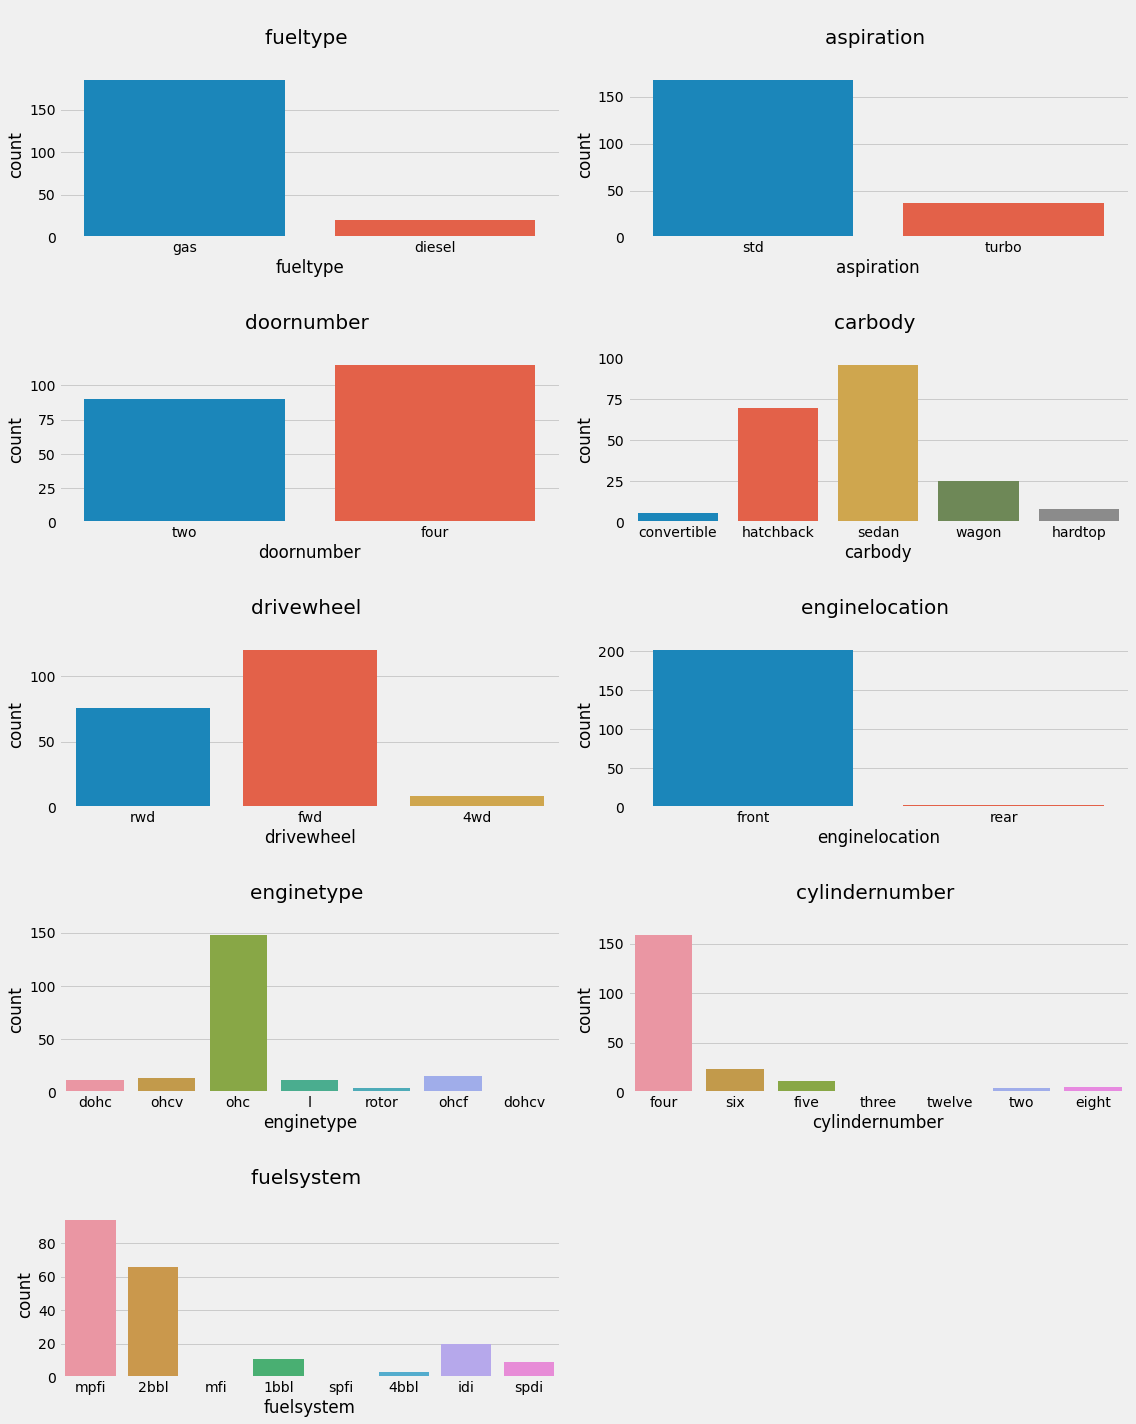

In [19]:
cols = cat_cols.columns
plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

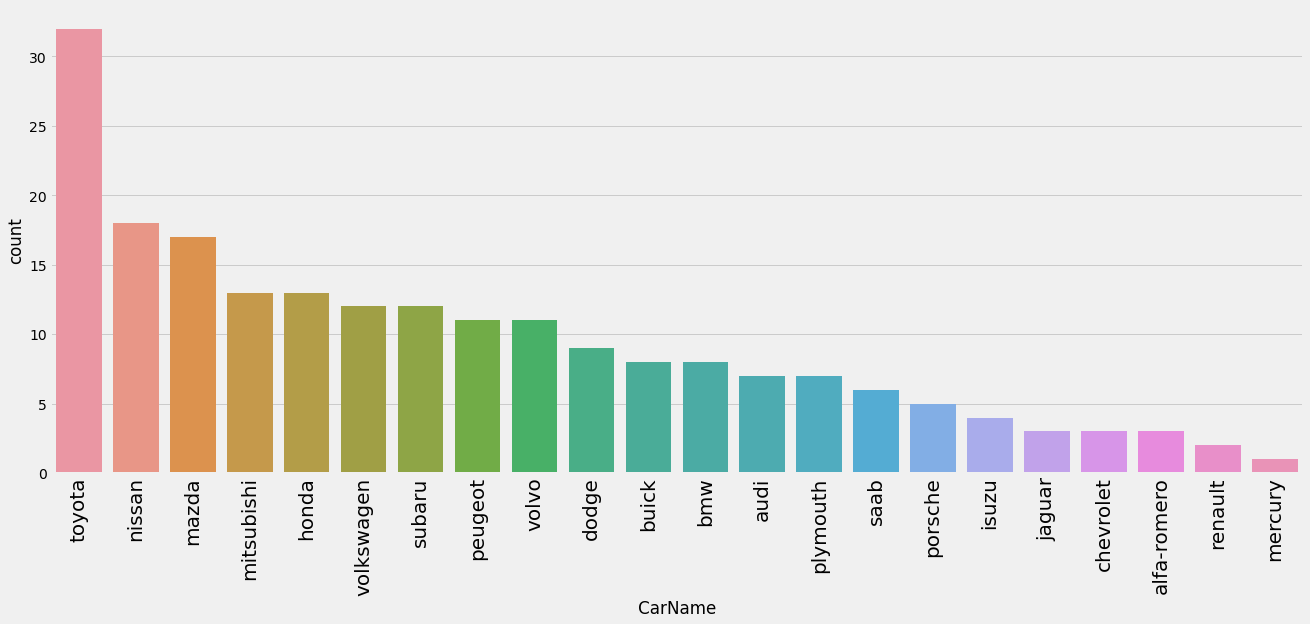

In [20]:
plt.figure(figsize=(20,8))
sns.countplot(x=df.CarName,data=df,order = df.CarName.value_counts().index)
plt.xticks(rotation=90,fontsize=20)
plt.show()

##### Observations:
- toyota nad nissan cars has high selling numbers.
- renault and mercury cars has less selling numbers

In [21]:
# pie chart of fueltype column

fueltype = df['fueltype'].value_counts().reset_index()
fueltype.columns = ['fueltype', 'value_counts']
fig = px.pie(fueltype, names = 'fueltype', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400)
fig.update_traces(textinfo = 'percent+label')

In [22]:
# pie chart of aspiration column

aspiration = df['aspiration'].value_counts().reset_index()
aspiration.columns = ['aspiration', 'value_counts']
fig = px.pie(aspiration, names = 'aspiration', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400)
fig.update_traces(textinfo = 'percent+label')

In [23]:
# pie chart of doornumber column

doornumber = df['doornumber'].value_counts().reset_index()
doornumber.columns = ['doornumber', 'value_counts']
fig = px.pie(doornumber, names = 'doornumber', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400)
fig.update_traces(textinfo = 'percent+label')

In [24]:
# pie chart of carbody column

carbody = df['carbody'].value_counts().reset_index()
carbody.columns = ['carbody', 'value_counts']
fig = px.pie(carbody, names = 'carbody', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400)
fig.update_traces(textinfo = 'percent+label')

In [25]:
# pie chart of drivewheel column

drivewheel = df['drivewheel'].value_counts().reset_index()
drivewheel.columns = ['drivewheel', 'value_counts']
fig = px.pie(drivewheel, names = 'drivewheel', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400)
fig.update_traces(textinfo = 'percent+label')

In [26]:
# pie chart of enginelocation column

enginelocation = df['enginelocation'].value_counts().reset_index()
enginelocation.columns = ['enginelocation', 'value_counts']
fig = px.pie(enginelocation, names = 'enginelocation', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400)
fig.update_traces(textinfo = 'percent+label')

In [27]:
# pie chart of enginetype column

enginetype = df['enginetype'].value_counts().reset_index()
enginetype.columns = ['enginetype', 'value_counts']
fig = px.pie(enginetype, names = 'enginetype', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400)
fig.update_traces(textinfo = 'percent+label')

In [28]:
# pie chart of cylindernumber column

cylindernumber = df['cylindernumber'].value_counts().reset_index()
cylindernumber.columns = ['cylindernumber', 'value_counts']
fig = px.pie(cylindernumber, names = 'cylindernumber', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400)
fig.update_traces(textinfo = 'percent+label')

In [29]:
# pie chart of fuelsystem column

fuelsystem = df['fuelsystem'].value_counts().reset_index()
fuelsystem.columns = ['fuelsystem', 'value_counts']
fig = px.pie(fuelsystem, names = 'fuelsystem', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400)
fig.update_traces(textinfo = 'percent+label')

## Bivariate and Multivariate Analysis

In [30]:
def get_corr(data,lb,ub):
    features=data['corr'].columns
    l=len(features)
    for i in range(l):
        for j in range(i+1,l):
            num=data['corr'][features[i]][features[j]]
            if(num>lb and num <ub):
                print(features[i],features[j],num)
            

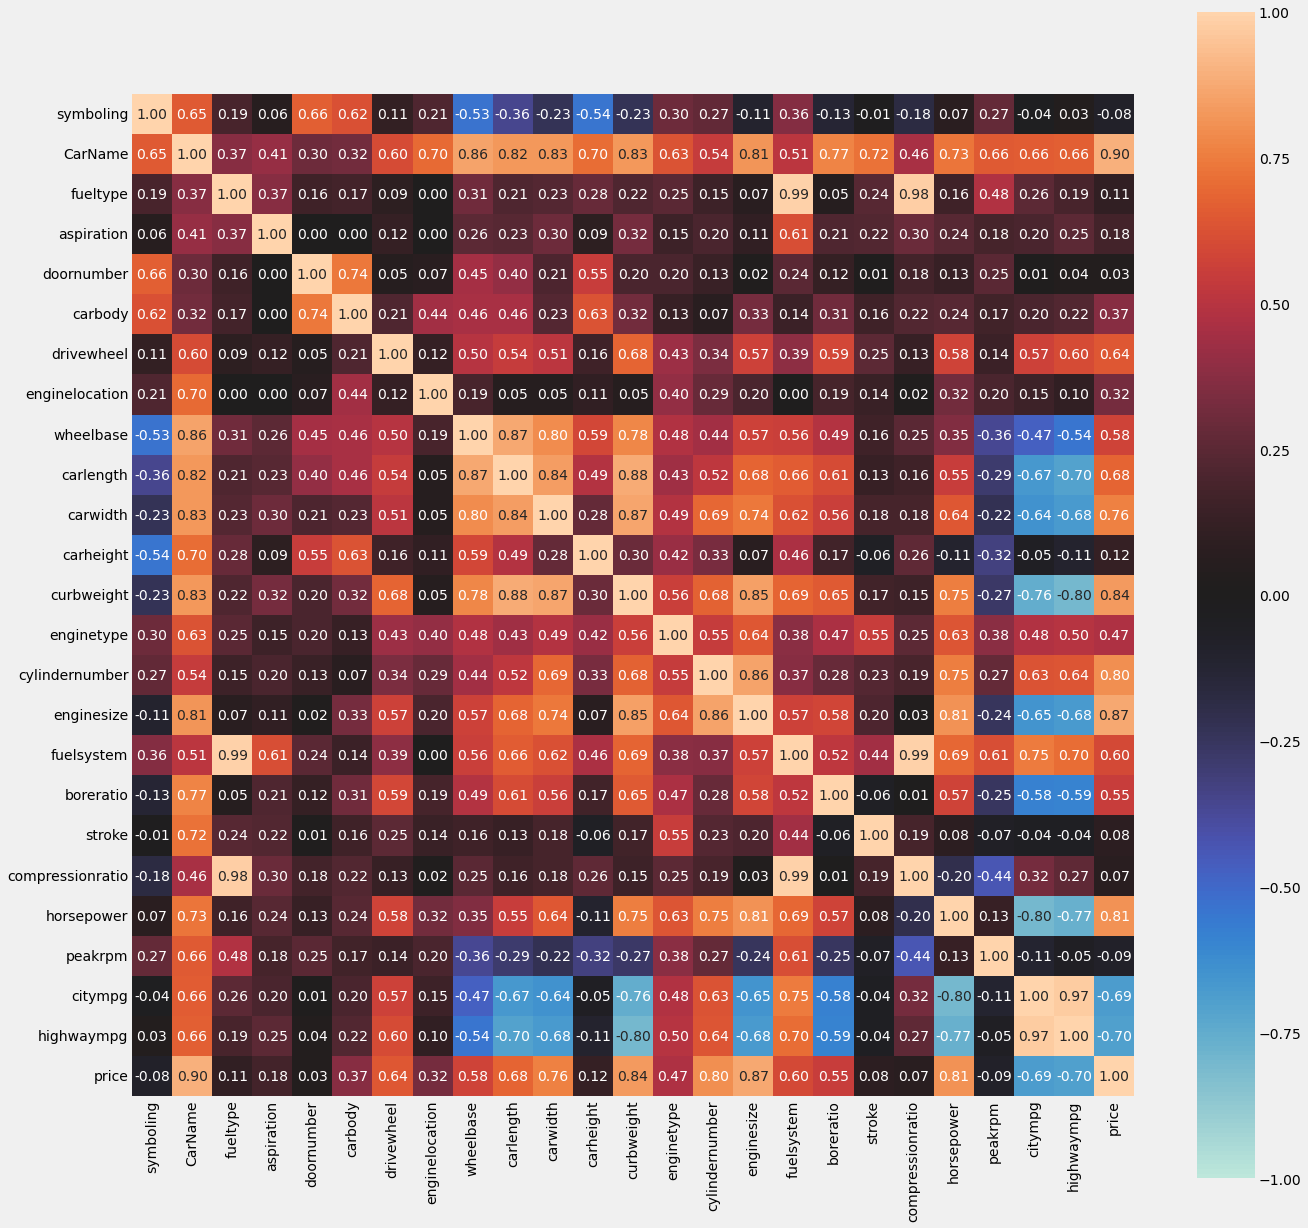

In [31]:
# finding correlation of numerical and categorical features

from dython.nominal import associations

data=associations(df, figsize = (20, 20))
plt.show()

In [32]:
get_corr(data,0.7,1)


CarName enginelocation 0.7025222637703454
CarName wheelbase 0.8558377298125945
CarName carlength 0.8240844793521777
CarName carwidth 0.8252060853823885
CarName carheight 0.7042315373149458
CarName curbweight 0.8265084516367929
CarName enginesize 0.8146336504864431
CarName boreratio 0.7669822700716878
CarName stroke 0.719462373647752
CarName horsepower 0.7293209237481344
CarName price 0.8955202685373745
fueltype fuelsystem 0.9851108312031163
fueltype compressionratio 0.9843560568767539
doornumber carbody 0.7410951272580552
wheelbase carlength 0.8745874759642631
wheelbase carwidth 0.7951436436169682
wheelbase curbweight 0.7763863277822112
carlength carwidth 0.841118268481845
carlength curbweight 0.8777284608306425
carwidth curbweight 0.8670324646791239
carwidth enginesize 0.7354334047796364
carwidth price 0.7593252997415115
curbweight enginesize 0.850594073426277
curbweight horsepower 0.7507392514434819
curbweight price 0.8353048793372967
cylindernumber enginesize 0.8579737549140736
cyli

##### Observations:
### Corelation between independent features and target feature 
- CarName,carwidth,curbweight,cylindernumber,enginesize,horsepower are highly positive corelated (more than 0.7) with price.
- highwaympg are highly negative corelated with price(less than -0.7)
- doornumber,compressionration,peakrpm are negligible corelated(between -0.1 to 0.1) with price.

### Corelation between independent features
- Wheelbase , carlength, carwidth and curbweight are highly correlated.
- Horsepower and enginesize are highly correlated.
- citympg and highwaympg are highly correlated.

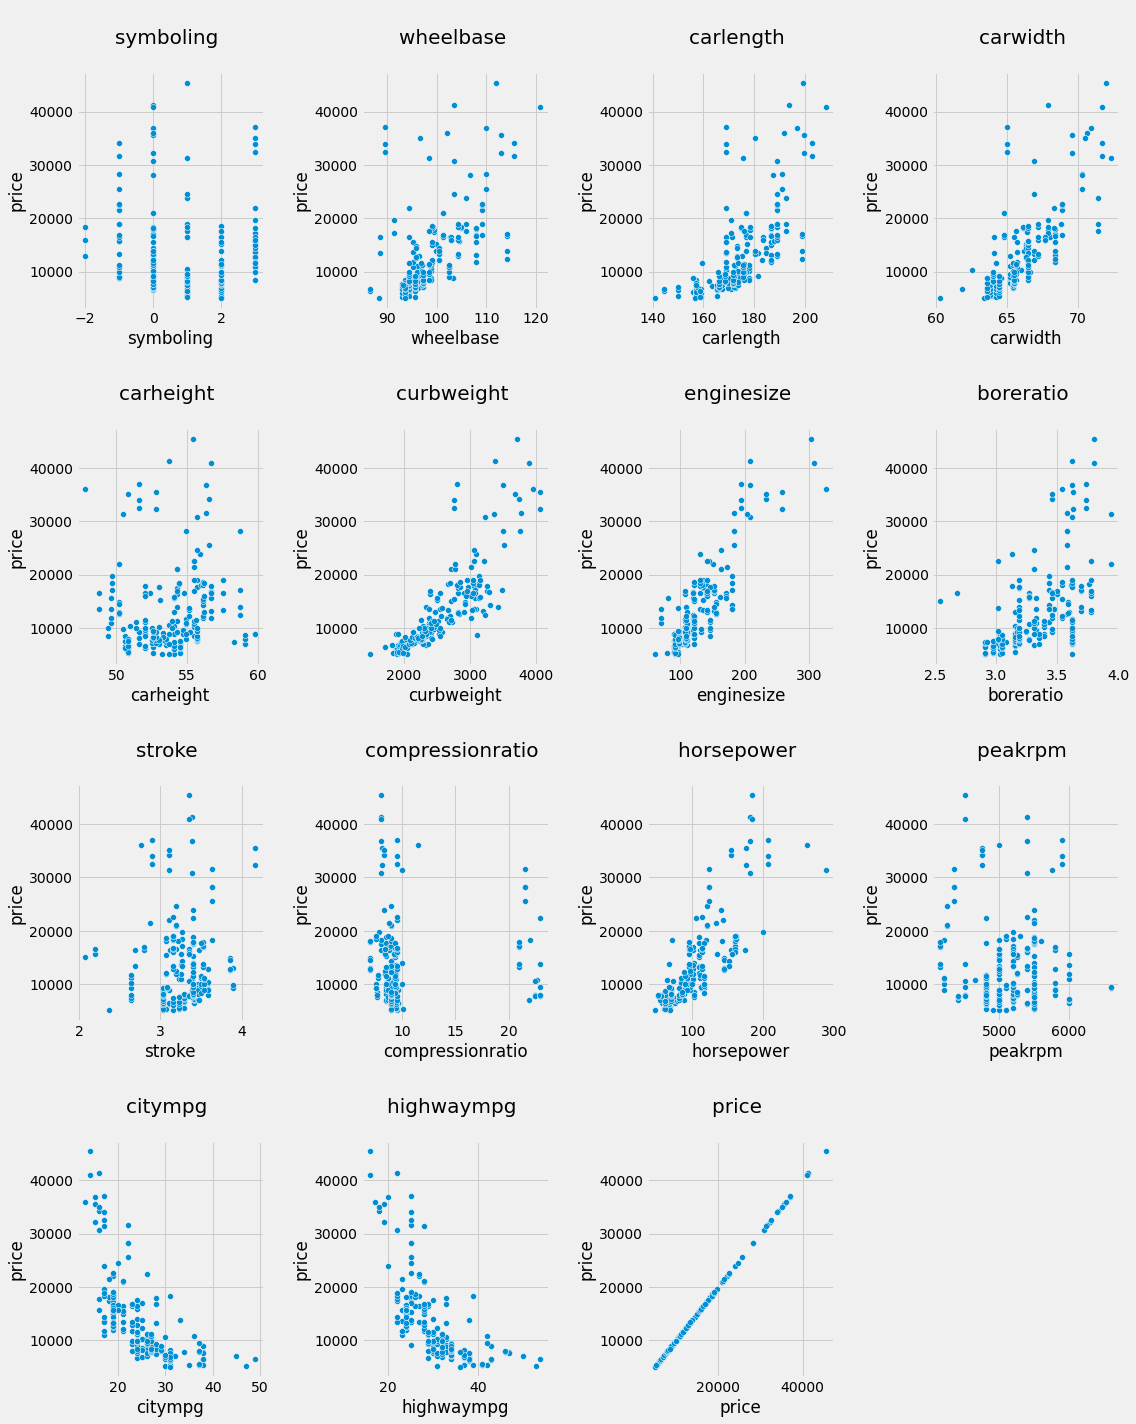

In [33]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x = cols[i], y = df['price'], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

##### Observations:
- CarName,carwidth,curbweight,cylindernumber,enginesize,horsepower are highly positive corelated (more than 0.7) with price.
- highwaympg are highly negative corelated with price(less than -0.7)
- doornumber,compressionration,peakrpm are negligible corelated(between -0.1 to 0.1) with price.

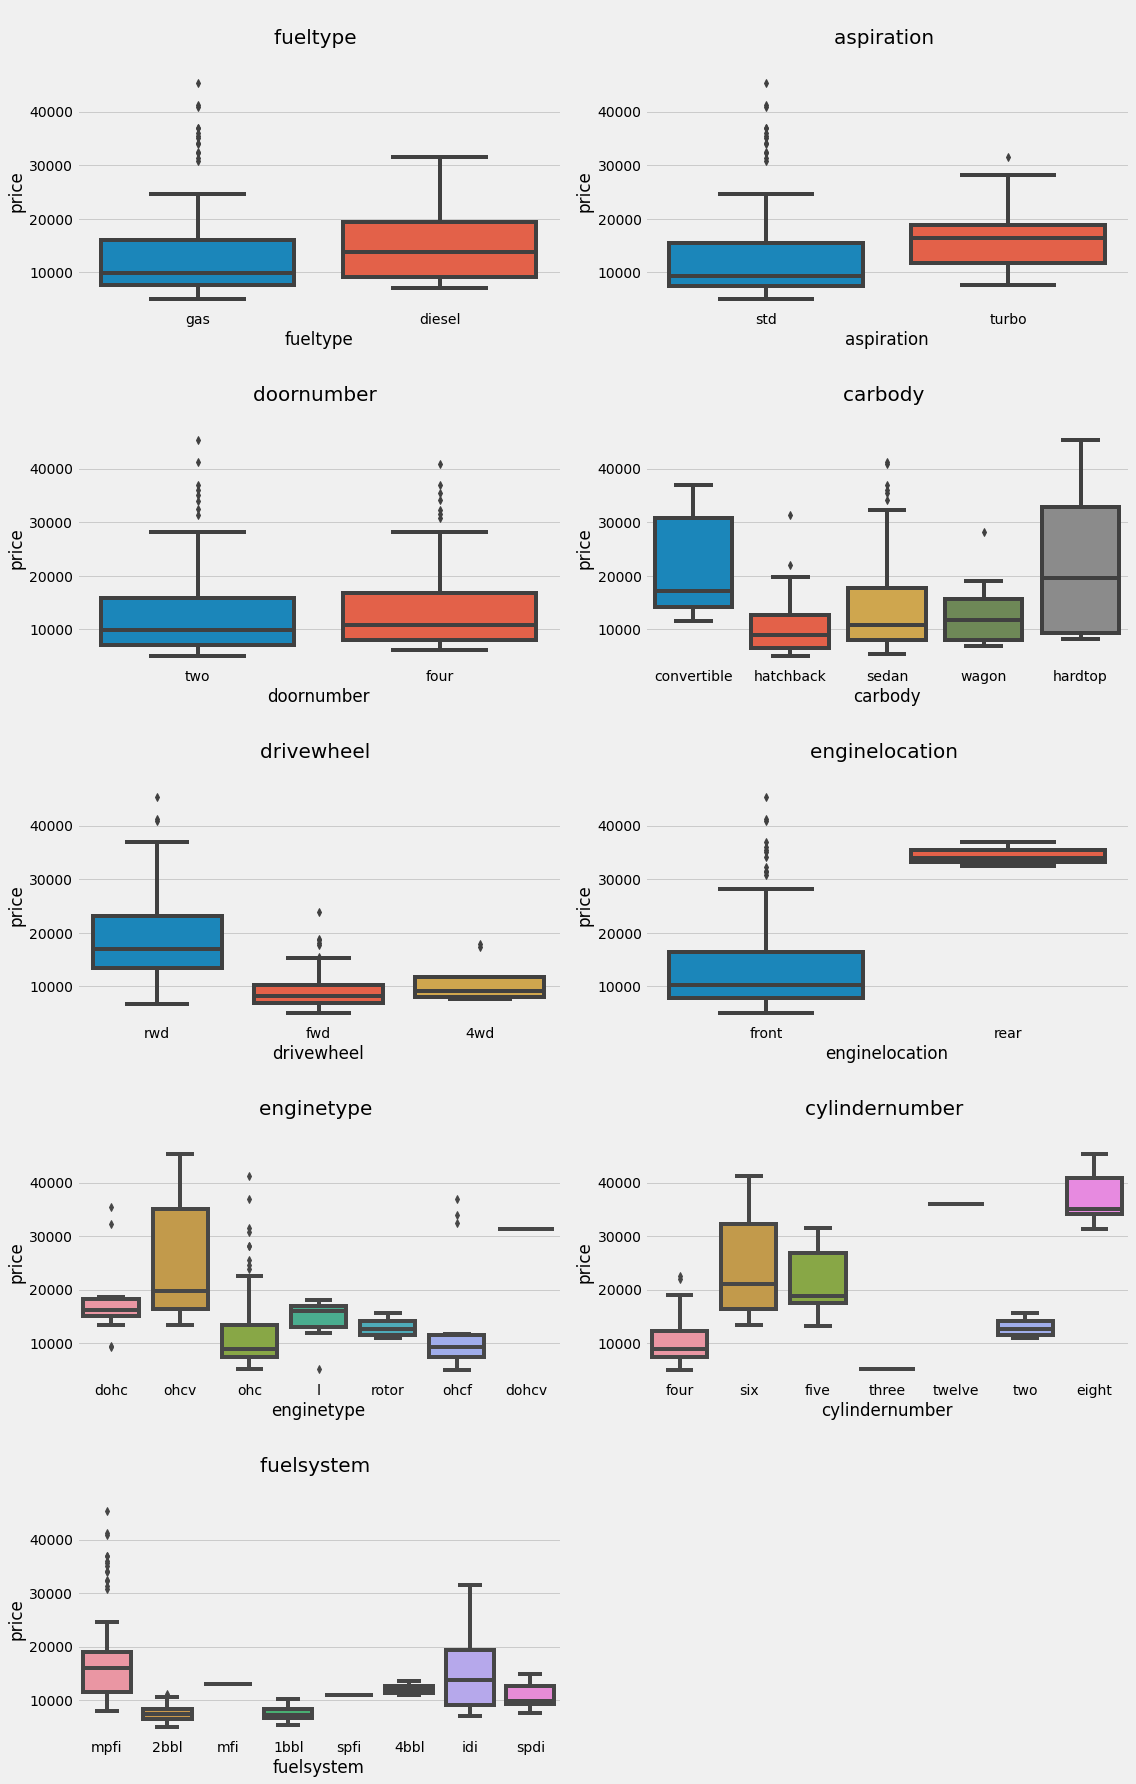

In [34]:
cols = cat_cols.columns

plt.figure(figsize = (16, 25))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(x = cols[i] ,y = df['price'], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

##### Observations:
- diesel fueltype car has high price than gas fueltype car.
- turbo aspiration car has high price than std aspiration car.
- type of doornumber has no effect on price.
- hardtop and convertible car has high price. 
- rwd driwerwheel car has high price. 
- rear enginelocation car price has **much higher** price than front enginelocation car
- Rich people dohch and ohcv enginetype in their car.
- 12 and 8 Cyllindernumber causes to a high price.
- mpfi fuelsystem is costly than others.

In [35]:
# encoding ordinal categorical columns

df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [36]:
# creating features and label variable

X = df.drop(columns = 'price', axis = 1)
y = df['price']

In [37]:
X = pd.get_dummies(X, drop_first = True)
X.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0          3           2       88.6      168.8      64.1       48.8   
1          3           2       88.6      168.8      64.1       48.8   
2          1           2       94.5      171.2      65.5       52.4   
3          2           4       99.8      176.6      66.2       54.3   
4          2           4       99.4      176.6      66.4       54.3   

   curbweight  cylindernumber  enginesize  boreratio  stroke  \
0        2548               4         130       3.47    2.68   
1        2548               4         130       3.47    2.68   
2        2823               6         152       2.68    3.47   
3        2337               4         109       3.19    3.40   
4        2824               5         136       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg  CarName_audi  \
0               9.0         111     5000       21          27             0   
1               9.0         111     5000       21          27             0   
2               9.0         154     5000       19          26             0   
3              10.0         102     5500       24          30             1   
4               8.0         115     5500       18          22             1   

   CarName_bmw  CarName_buick  CarName_chevrolet  CarName_dodge  \
0            0              0                  0              0   
1            0              0                  0              0   
2            0              0                  0              0   
3            0              0                  0              0   
4            0              0                  0              0   

   CarName_honda  CarName_isuzu  CarName_jaguar  CarName_mazda  \
0              0              0               0              0   
1              0              0               0              0   
2              0              0               0              0   
3              0              0               0              0   
4              0              0               0              0   

   CarName_mercury  CarName_mitsubishi  CarName_nissan  CarName_peugeot  \
0                0                   0               0                0   
1                0                   0               0                0   
2                0                   0               0                0   
3                0                   0               0                0   
4                0                   0               0                0   

   CarName_plymouth  CarName_porsche  CarName_renault  CarName_saab  \
0                 0                0                0             0   
1                 0                0                0             0   
2                 0                0                0             0   
3                 0                0                0             0   
4                 0                0                0             0   

   CarName_subaru  CarName_toyota  CarName_volkswagen  CarName_volvo  \
0               0               0                   0              0   
1               0               0                   0              0   
2               0               0                   0              0   
3               0               0                   0              0   
4               0               0                   0              0   

   fueltype_gas  aspiration_turbo  carbody_hardtop  carbody_hatchback  \
0             1                 0                0                  0   
1             1                 0                0                  0   
2             1                 0                0                  1   
3             1                 0                0                  0   
4             1                 0                0                  0   

   carbody_sedan  carbody_wagon  drivewheel_fwd  drivewheel_rwd  \
0              0              0               0               1   
1              0              0 

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [39]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

## Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
lr.score(X_train, y_train)

0.9771046592520128

In [42]:
lr.score(X_test, y_test)

0.8822513664205046

## Lasso Regression

In [43]:
from sklearn.linear_model import Lasso, LassoCV

In [44]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [45]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=9.328571004631788)

In [46]:
lasso.score(X_train, y_train)

0.9758210702431155

In [47]:
lasso.score(X_test, y_test)

0.881430831209954

## Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor( random_state = 42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [49]:
dtr.score(X_train, y_train)

0.9985524829197424

In [50]:
dtr.score(X_test, y_test)

0.8807888881424315

## Random Forest Regression

In [51]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
rfr.score(X_train, y_train)

0.985955964789155

In [53]:
rfr.score(X_test, y_test)

0.941998694797902

## Ada Boost

In [54]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(base_estimator = dtr)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42))

In [55]:
ada.score(X_train, y_train)

0.9967387160932699

In [56]:
ada.score(X_test, y_test)

0.9245209850106838

## Gradient Boost Regressor

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [58]:
gbr.score(X_train, y_train)

0.9947317233972207

In [59]:
gbr.score(X_test, y_test)

0.9234985413838515

## XgBoost

In [60]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [61]:
xgb.score(X_train, y_train)

0.9985494349518815

In [62]:
xgb.score(X_test, y_test)

0.9166648972545447

## Voting Regressor

In [63]:
from sklearn.ensemble import VotingRegressor

regressors = [('Linear Regression', lr), ('Lasso Regression', lasso), ('Decision Tree', dtr), ('Random Forest', rfr), ('Ada Boost', ada), ('Gradient Boost', gbr),
              ('XgBoost', xgb)]

vr = VotingRegressor(estimators = regressors, n_jobs = -1, verbose = 1, weights = (0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.8))
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Lasso Regression',
                             Lasso(alpha=9.328571004631788)),
                            ('Decision Tree',
                             DecisionTreeRegressor(random_state=42)),
                            ('Random Forest', RandomForestRegressor()),
                            ('Ada Boost',
                             AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42))),
                            ('Gradient Boost', GradientBoostingRegressor()),
                            ('...
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.1, max_bin=256,
                                          max_cat_threshold=64,
                                          max_cat_to_onehot=4, max_delta_step=0,
                                          max_depth=7, max_leaves=0,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=200, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, ...))],
                n_jobs=-1, verbose=1,
                weights=(0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.8))

In [64]:
vr.score(X_train, y_train)

0.9970372129561421

In [65]:
vr.score(X_test, y_test)

0.9279771344968363

In [66]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XgBoost', "Voting Regressor"],
    'Score' : [lr.score(X_test, y_test), lasso.score(X_test, y_test), dtr.score(X_test, y_test), rfr.score(X_test, y_test), ada.score(X_test, y_test),
               gbr.score(X_test, y_test), xgb.score(X_test, y_test), vr.score(X_test, y_test)]
})

models.sort_values(by = 'Score', ascending = False)

Model     Score
3      Random Forest  0.941999
7   Voting Regressor  0.927977
4          Ada Boost  0.924521
5     Gradient Boost  0.923499
6            XgBoost  0.916665
0  Linear Regression  0.882251
1   Lasso Regression  0.881431
2      Decision Tree  0.880789